In [2]:
#Importerer pakker
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [16]:
#Definerer symboler
K, N, A = sp.symbols('K N A', positive=True, real=True)

#Definerer produktfunksjon
def prod(K, N, A):
    return K*(sp.exp(N)/(A+sp.exp(N)))

#Finner den deriverte med hensyn til N (timer arbeid)
def prod_der(K, N, A):
    return sp.diff(prod(K, N, A), N)

#Funksjon for gjennomsnittsproduktivitet
def prod_mean(K, N, A):
    return prod(K, N, A)/N

display(prod(K, N, A), prod_der(K, N, A), prod_mean(K, N, A))

K*exp(N)/(A + exp(N))

K*exp(N)/(A + exp(N)) - K*exp(2*N)/(A + exp(N))**2

K*exp(N)/(N*(A + exp(N)))

In [19]:
#time to lambdify

prod_lam = sp.lambdify(
    (K, N, A), 
    prod(K, N, A)
)

prod_der_l = sp.lambdify(
    (K, N, A), 
    prod_der(K, N, A)
)

prod_mean_l = sp.lambdify(
    (K, N, A), 
    prod_mean(K, N, A)
)

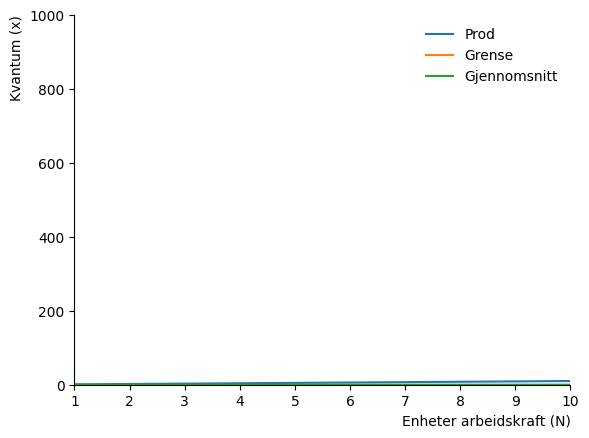

In [20]:
#Genererer akse, kode hentet fra "notater forelesning 7"

n=np.linspace(1,10,100)

fig, ax = plt.subplots()
ax.set_ylabel('Kvantum (x)', loc='top')
ax.set_xlabel('Enheter arbeidskraft (N)', loc='right')
ax.set(xlim=(1,10))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#legger til linjer
ax.plot(n, prod_lam(n, 200, 1000), label="Prod")
ax.plot(n, prod_der_l(n, 200, 1000), label="Grense")
ax.plot(n, prod_mean_l(n, 200, 1000), label="Gjennomsnitt")

ax.legend(loc='best',frameon=False);

In [7]:
np.max(prod_der_l(n, 200, 1000))

0.0